 **Data Preprocessing for three datasets**

**max_length = 20, train on dataset2, tokenizer no dataset2,  transfer on to dataset1, dataset3(full dataset), fix_layer, fine tune, epoch = 20**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Read data, pre-processing**

In [ ]:
data1 = pd.read_csv("dataset1.csv") 
data2 = pd.read_csv("hate_speech.csv") 
data3 = pd.read_csv("train.csv") 

In [ ]:
data1.drop(columns = 'Unnamed: 0',inplace=True)
data1.drop(columns = {'count', 'hate_speech', 'offensive_language','neither'},inplace = True)
data1.rename(columns = {'tweet' : 'text', 'class' : 'label'},inplace= True)
data2.drop(columns = 'Unnamed: 0',inplace=True)
data3.drop(columns = {'id','severe_toxic','obscene','threat','insult','identity_hate'},inplace=True)
data3.rename(columns = {'comment_text': 'text', 'toxic':'label'}, inplace = True)

**build balanced distribution for dataset2**

In [ ]:
hate = data2.where(data2['label'] == 1)
hate = hate.dropna()
not_hate = data2.where(data2['label'] == 0)
not_hate = not_hate.dropna()
not_hate = not_hate[:4700]
hate = hate[:4700]
data2 = pd.concat([hate, not_hate])

In [ ]:
data2.groupby(['label']).count()[['text']]

,text
label,
0.0,5000
1.0,4784


In [ ]:
from sklearn.utils import shuffle
data2 = shuffle(data2)
data2.reset_index(drop=True, inplace = True)

**build balanced dataset for dataset 1**

In [ ]:
neither = data1.where((data1['label'] == 2))
neither = neither.dropna()

offensive = data1.where((data1['label'] == 1))
offensive = offensive.dropna()

hate = data1.where((data1['label'] == 0))
hate = hate.dropna()

In [ ]:
offensive = offensive[:3000]
hate = [:1000]
neither = neither[:4000]

In [ ]:
data1 = pd.concat([neither, offensive, hate])

In [ ]:
data1.label.value_counts()

2.0    4163
1.0    3000
0.0    1430
Name: label, dtype: int64

In [ ]:
data1['label'].replace(0, 1, inplace=True)
data1['label'].replace(2, 0, inplace=True)

In [ ]:
data1.label.value_counts()

1.0    4430
0.0    4163
Name: label, dtype: int64

In [ ]:
from sklearn.utils import shuffle
data1 = shuffle(data1)
data1.reset_index(drop=True,inplace=True)

**build balanced dataset for dataset3**

In [ ]:
toxic = data3.where((data3['label'] == 1))
toxic = toxic.dropna()
not_toxic = data3.where((data3['label'] == 0))
not_toxic = not_toxic.dropna()

In [ ]:
data3.label.value_counts()

0    144277
1    15294 
Name: label, dtype: int64

In [ ]:
not_toxic = not_toxic[:15000]
toxic = [:15000]

In [ ]:
data3 = pd.concat([toxic, not_toxic])

In [ ]:
data3.label.value_counts()

0.0    16000
1.0    15294
Name: label, dtype: int64

In [ ]:
from sklearn.utils import shuffle
data3 = shuffle(data3)
data3.reset_index(drop=True,inplace=True)

**Data-Preprocessing**

In [ ]:
# remove puctunations, https
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df


In [ ]:
data1 = clean_text(data1, 'text')
data2 = clean_text(data2, 'text')
data3 = clean_text(data3, 'text')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
data1['text'] = data1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data2['text'] = data2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data3['text'] = data3['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# Split train, test

In [ ]:
train_size1 = int(data1.shape[0] * 0.05)
train_size2 = int(data2.shape[0] * 0.8)
train_size3 = int(data3.shape[0] * 0.06)

train1_sentences = data1.text[:train_size1]
train1_labels = data1['label'][:train_size1]
test1_sentences = data1.text[train_size1:]
test1_labels = data1['label'][train_size1:]

train2_sentences = data2.text[:train_size2]
train2_labels = data2['label'][:train_size2]
test2_sentences = data2.text[train_size2:]
test2_labels = data2['label'][train_size2:]

train3_sentences = data3.text[:train_size3]
train3_labels = data3['label'][:train_size3]
test3_sentences = data3.text[train_size3:]
test3_labels = data3['label'][train_size3:]


merge_text = pd.concat([train1_sentences, train2_sentences, train3_sentences], ignore_index=True)

In [ ]:
from collections import Counter

#count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word]+=1
    return count

In [ ]:
text = merge_text
counter = counter_word(text)

In [ ]:
counter

In [ ]:
len(counter)

19806

In [ ]:
# the size of dictionary
num_words = len(counter)

#max number of words in a sequence
max_length = 50

**train/test split**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words)
#tokenizer.fit_on_texts(train1_sentences)
tokenizer.fit_on_texts(merge_text)
#tokenizer.fit_on_texts(train3_sentences)

word_index = tokenizer.word_index

train1_sequences = tokenizer.texts_to_sequences(train1_sentences)
test1_sequences = tokenizer.texts_to_sequences(test1_sentences)

train2_sequences = tokenizer.texts_to_sequences(train2_sentences)
test2_sequences = tokenizer.texts_to_sequences(test2_sentences)

train3_sequences = tokenizer.texts_to_sequences(train3_sentences)
test3_sequences = tokenizer.texts_to_sequences(test3_sentences)

train1_padded = pad_sequences(
    train1_sequences,maxlen = max_length, padding = "post", truncating = "post")
test1_padded = pad_sequences(
    test1_sequences,maxlen = max_length, padding = "post", truncating = "post")

train2_padded = pad_sequences(
    train2_sequences,maxlen = max_length, padding = "post", truncating = "post")
test2_padded = pad_sequences(
    test2_sequences,maxlen = max_length, padding = "post", truncating = "post")

train3_padded = pad_sequences(
    train3_sequences,maxlen = max_length, padding = "post", truncating = "post")
test3_padded = pad_sequences(
    test3_sequences,maxlen = max_length, padding = "post", truncating = "post")

In [ ]:
print(data1.text[1])
print(train1_sequences[1])
print(data2.text[1])
print(train2_sequences[1])
print(data3.text[1])
print(train3_sequences[1])

probably yeah accounts personality handle though wear yellow suit puts points
[163, 188, 1754, 3699, 2160, 186, 1278, 423, 4309, 3700, 912]
well good
[45, 23]
done currently reads least 55 million section holocaust reads 55 six million references im sure issue talk contribs
[135, 965, 2519, 206, 5230, 957, 179, 414, 2519, 5230, 2354, 957, 690, 22, 136, 612, 29, 1327]


# check inverse

In [ ]:
reverse_word_index = dict([value,key] for (key,value) in word_index.items())

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i,"?") for i in text])

In [ ]:
decode(train1_sequences[0])

'dont want one new bitches morphed super playa see world'

In [ ]:
train1_padded.shape

(429, 50)

In [ ]:
test1_padded.shape

(8164, 50)

In [ ]:
train2_padded.shape


(7827, 50)

In [ ]:
test2_padded.shape

(1957, 50)

In [ ]:
train3_padded.shape

(1877, 50)

In [ ]:
test3_padded.shape

(29417, 50)

build model

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()
model.add(layers.Embedding(num_words, 128, input_length = max_length))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(250))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 128)           2535168   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 46, 64)            41024     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               16250     
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_6 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

**train on dataset2**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
batch_size = 32

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train2_padded, train2_labels, batch_size=batch_size, epochs=10, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.1,)

Train on 7044 samples, validate on 783 samples
Epoch 1/10
7044/7044 [==============================] - 12s 2ms/step - loss: 0.4576 - accuracy: 0.7720 - val_loss: 0.2110 - val_accuracy: 0.9298
Epoch 2/10
7044/7044 [==============================] - 12s 2ms/step - loss: 0.0758 - accuracy: 0.9766 - val_loss: 0.0900 - val_accuracy: 0.9732
Epoch 3/10
7044/7044 [==============================] - 11s 2ms/step - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.1181 - val_accuracy: 0.9617
Epoch 4/10
7044/7044 [==============================] - 11s 2ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0816 - val_accuracy: 0.9796
Epoch 5/10
7044/7044 [==============================] - 11s 2ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0711 - val_accuracy: 0.9834
Epoch 6/10
7044/7044 [==============================] - 10s 1ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0990 - val_accuracy: 0.9770
Epoch 7/10
7044/7044 [==============================] - 10s 1ms/step - loss: 0.0017

In [ ]:
# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
  _,train_acc = model.evaluate(trainX, trainy, verbose=0)
  _,test_acc = model.evaluate(testX, testy, verbose=0)
  print('Train: %.3f, Test: %.3f' %(train_acc, test_acc))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Train: 0.998, Test: 0.964


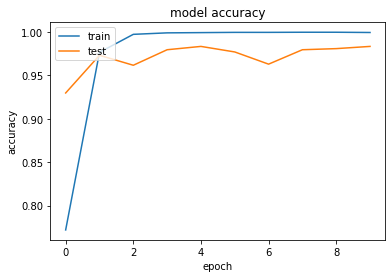

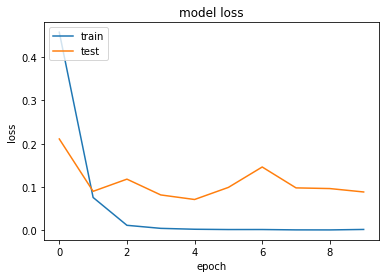

In [ ]:
summarize_model(model, history, train2_padded, train2_labels, test2_padded, test2_labels)

In [ ]:
def classification_report(testX, testy):
  # predict crisp classes for test set
  yhat_classes = model.predict_classes(testX, verbose=0)
  from sklearn.metrics import classification_report
  target_names =  ['class 0', 'class 1']
  print(classification_report(testy, yhat_classes, target_names=target_names, digits = 4))


In [ ]:
classification_report(test2_padded, test2_labels)

              precision    recall  f1-score   support

     class 0     0.9873    0.9407    0.9635       995
     class 1     0.9415    0.9875    0.9640       962

    accuracy                         0.9637      1957
   macro avg     0.9644    0.9641    0.9637      1957
weighted avg     0.9648    0.9637    0.9637      1957



In [ ]:
model.save('model.h5')

**fix first two layers**

In [ ]:
from keras.models import load_model
# load and re-fit model on a training dataset
def fix_layer(trainX, trainy):
  # load model
  model = load_model('model.h5')
  # compile model
  model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 3e-4), metrics = ["accuracy"])
  # fix the first two layers
  model.layers[0].trainable = False
  model.layers[1].trainable = False
  # re-fit model
  history = model.fit(trainX, trainy, batch_size=batch_size, epochs=10, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.1,)
  return model, history

**fine-tune**

In [ ]:
from keras.models import load_model
# load and re-fit model on a training dataset
def fit_model(trainX, trainy):
	# load model
	model = load_model('model.h5')
	# compile model
	model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 3e-4), metrics = ["accuracy"])
	# re-fit model
	history = model.fit(trainX, trainy, batch_size=batch_size, epochs=10, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.1,)
	return model, history

**Fix layers(Transfer in dataset1)**

In [ ]:
model, history = fix_layer(train1_padded, train1_labels)

Train on 386 samples, validate on 43 samples
Epoch 1/10
386/386 [==============================] - 1s 2ms/step - loss: 2.8340 - accuracy: 0.4870 - val_loss: 1.4643 - val_accuracy: 0.6744
Epoch 2/10
386/386 [==============================] - 1s 2ms/step - loss: 1.4885 - accuracy: 0.6528 - val_loss: 0.7849 - val_accuracy: 0.8140
Epoch 3/10
386/386 [==============================] - 1s 2ms/step - loss: 0.9170 - accuracy: 0.7383 - val_loss: 0.5542 - val_accuracy: 0.8140
Epoch 4/10
386/386 [==============================] - 1s 2ms/step - loss: 0.6173 - accuracy: 0.8290 - val_loss: 0.4855 - val_accuracy: 0.8605
Epoch 5/10
386/386 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8731 - val_loss: 0.4700 - val_accuracy: 0.8372
Epoch 6/10
386/386 [==============================] - 1s 2ms/step - loss: 0.2831 - accuracy: 0.9041 - val_loss: 0.4233 - val_accuracy: 0.8837
Epoch 7/10
386/386 [==============================] - 1s 2ms/step - loss: 0.1912 - accuracy: 0.9326 - v

Train: 0.977, Test: 0.696


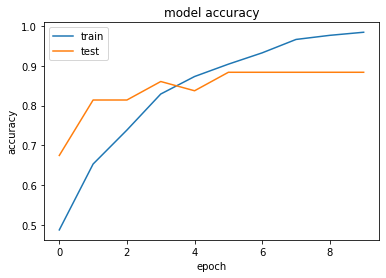

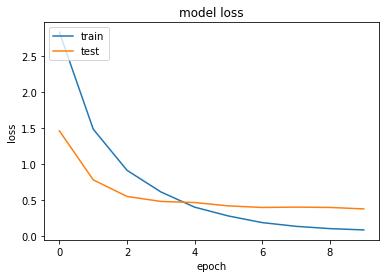

In [ ]:
summarize_model(model, history, train1_padded, train1_labels, test1_padded, test1_labels)

In [ ]:
classification_report(test1_padded, test1_labels)

              precision    recall  f1-score   support

     class 0     0.6949    0.6706    0.6825      3977
     class 1     0.6972    0.7203    0.7086      4187

    accuracy                         0.6961      8164
   macro avg     0.6960    0.6955    0.6955      8164
weighted avg     0.6961    0.6961    0.6959      8164



**Fix layers(transfer to dataset3)**

In [ ]:
model, history = fix_layer(train3_padded, train3_labels)

Train on 1689 samples, validate on 188 samples
Epoch 1/10
1689/1689 [==============================] - 3s 2ms/step - loss: 1.7230 - accuracy: 0.5844 - val_loss: 0.8632 - val_accuracy: 0.6383
Epoch 2/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.5350 - accuracy: 0.7993 - val_loss: 0.6840 - val_accuracy: 0.7021
Epoch 3/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9070 - val_loss: 0.6599 - val_accuracy: 0.6755
Epoch 4/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.1558 - accuracy: 0.9597 - val_loss: 0.6512 - val_accuracy: 0.6968
Epoch 5/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9769 - val_loss: 0.6619 - val_accuracy: 0.6968
Epoch 6/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9893 - val_loss: 0.6664 - val_accuracy: 0.7021
Epoch 7/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.0460 - accu

Train: 0.969, Test: 0.738


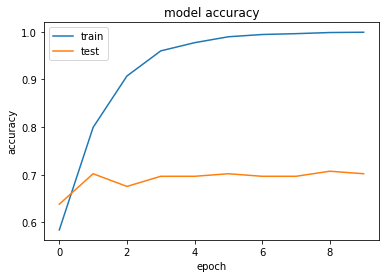

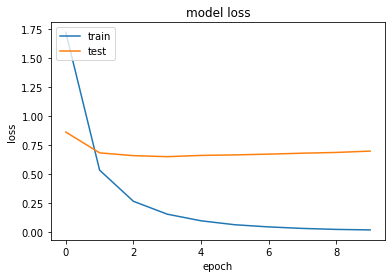

In [ ]:
summarize_model(model, history, train3_padded, train3_labels, test3_padded, test3_labels)

In [ ]:
classification_report(test3_padded, test3_labels)

              precision    recall  f1-score   support

     class 0     0.7498    0.7349    0.7423     15084
     class 1     0.7267    0.7420    0.7343     14333

    accuracy                         0.7383     29417
   macro avg     0.7383    0.7384    0.7383     29417
weighted avg     0.7386    0.7383    0.7384     29417



**Fine-tune on dataset1**

In [ ]:
model, history = fit_model(train1_padded, train1_labels)

Train on 386 samples, validate on 43 samples
Epoch 1/10
386/386 [==============================] - 1s 2ms/step - loss: 2.7593 - accuracy: 0.5000 - val_loss: 1.3900 - val_accuracy: 0.6744
Epoch 2/10
386/386 [==============================] - 1s 2ms/step - loss: 1.4213 - accuracy: 0.6580 - val_loss: 0.7390 - val_accuracy: 0.8140
Epoch 3/10
386/386 [==============================] - 1s 2ms/step - loss: 0.8768 - accuracy: 0.7409 - val_loss: 0.5598 - val_accuracy: 0.8140
Epoch 4/10
386/386 [==============================] - 1s 2ms/step - loss: 0.5821 - accuracy: 0.8238 - val_loss: 0.4738 - val_accuracy: 0.8605
Epoch 5/10
386/386 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8912 - val_loss: 0.4478 - val_accuracy: 0.8837
Epoch 6/10
386/386 [==============================] - 1s 2ms/step - loss: 0.2490 - accuracy: 0.9197 - val_loss: 0.4589 - val_accuracy: 0.8372
Epoch 7/10
386/386 [==============================] - 1s 2ms/step - loss: 0.1892 - accuracy: 0.9404 - v

Train: 0.977, Test: 0.699


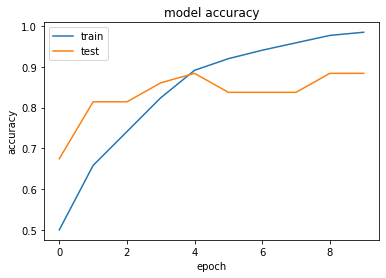

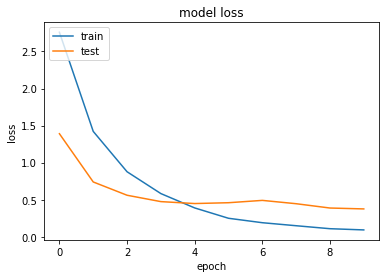

In [ ]:
summarize_model(model, history, train1_padded, train1_labels, test1_padded, test1_labels)

In [ ]:
classification_report(test1_padded, test1_labels)

              precision    recall  f1-score   support

     class 0     0.7001    0.6691    0.6842      3977
     class 1     0.6984    0.7277    0.7127      4187

    accuracy                         0.6992      8164
   macro avg     0.6992    0.6984    0.6985      8164
weighted avg     0.6992    0.6992    0.6989      8164



**Fine tune on dataset3**

In [ ]:
model, history = fit_model(train3_padded, train3_labels)

Train on 1689 samples, validate on 188 samples
Epoch 1/10
1689/1689 [==============================] - 3s 2ms/step - loss: 1.6679 - accuracy: 0.5944 - val_loss: 0.8729 - val_accuracy: 0.6330
Epoch 2/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.5185 - accuracy: 0.7928 - val_loss: 0.6805 - val_accuracy: 0.6915
Epoch 3/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.2640 - accuracy: 0.9106 - val_loss: 0.6525 - val_accuracy: 0.7128
Epoch 4/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.1537 - accuracy: 0.9609 - val_loss: 0.6484 - val_accuracy: 0.6862
Epoch 5/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.0963 - accuracy: 0.9805 - val_loss: 0.6501 - val_accuracy: 0.7181
Epoch 6/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9876 - val_loss: 0.6595 - val_accuracy: 0.7021
Epoch 7/10
1689/1689 [==============================] - 3s 2ms/step - loss: 0.0465 - accu

Train: 0.970, Test: 0.739


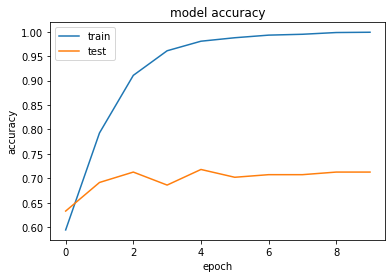

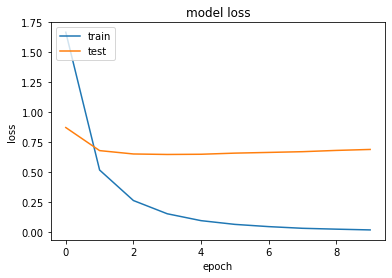

In [ ]:
summarize_model(model, history, train3_padded, train3_labels, test3_padded, test3_labels)

In [ ]:
classification_report(test3_padded, test3_labels)

              precision    recall  f1-score   support

     class 0     0.7545    0.7276    0.7408     15084
     class 1     0.7237    0.7509    0.7370     14333

    accuracy                         0.7389     29417
   macro avg     0.7391    0.7392    0.7389     29417
weighted avg     0.7395    0.7389    0.7390     29417

